In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
#数据加载
path = os.path.abspath(os.path.dirname(os.getcwd()) + os.path.sep + ".")
input_path = path + '/Colab Notebooks/'
train_data = pd.read_csv(input_path+'used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv(input_path+'used_car_testB_20200421.csv', sep=' ')
print(train_data.info)

<bound method DataFrame.info of         SaleID    name   regDate  model  ...      v_11      v_12      v_13      v_14
0            0     736  20040402   30.0  ...  2.804097 -2.420821  0.795292  0.914762
1            1    2262  20030301   40.0  ...  2.096338 -1.030483 -1.722674  0.245522
2            2   14874  20040403  115.0  ...  1.803559  1.565330 -0.832687 -0.229963
3            3   71865  19960908  109.0  ...  1.285940 -0.501868 -2.438353 -0.478699
4            4  111080  20120103  110.0  ...  0.910783  0.931110  2.834518  1.923482
...        ...     ...       ...    ...  ...       ...       ...       ...       ...
149995  149995  163978  20000607  121.0  ... -2.983973  0.589167 -1.304370 -0.302592
149996  149996  184535  20091102  116.0  ... -2.774615  2.553994  0.924196 -0.272160
149997  149997  147587  20101003   60.0  ... -1.630677  2.290197  1.891922  0.414931
149998  149998   45907  20060312   34.0  ... -2.633719  1.414937  0.431981 -1.659014
149999  149999  177672  19990204 

In [5]:
# 查看数据缺失值
print(train_data.isnull().any())
print(train_data.isnull().sum())

SaleID               False
name                 False
regDate              False
model                 True
brand                False
bodyType              True
fuelType              True
gearbox               True
power                False
kilometer            False
notRepairedDamage    False
regionCode           False
seller               False
offerType            False
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                  False
v_6                  False
v_7                  False
v_8                  False
v_9                  False
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
dtype: bool
SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             

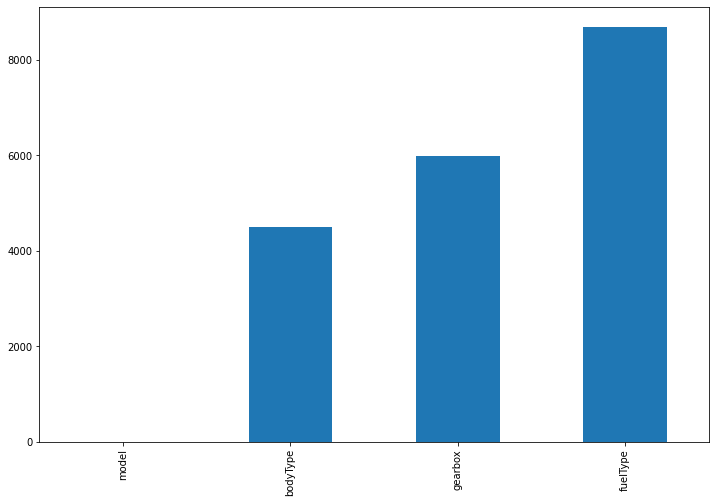

In [6]:
# null可视化
import matplotlib.pyplot as plt
############ 可视化Start  ##############
plt.figure(figsize=(12, 8))
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

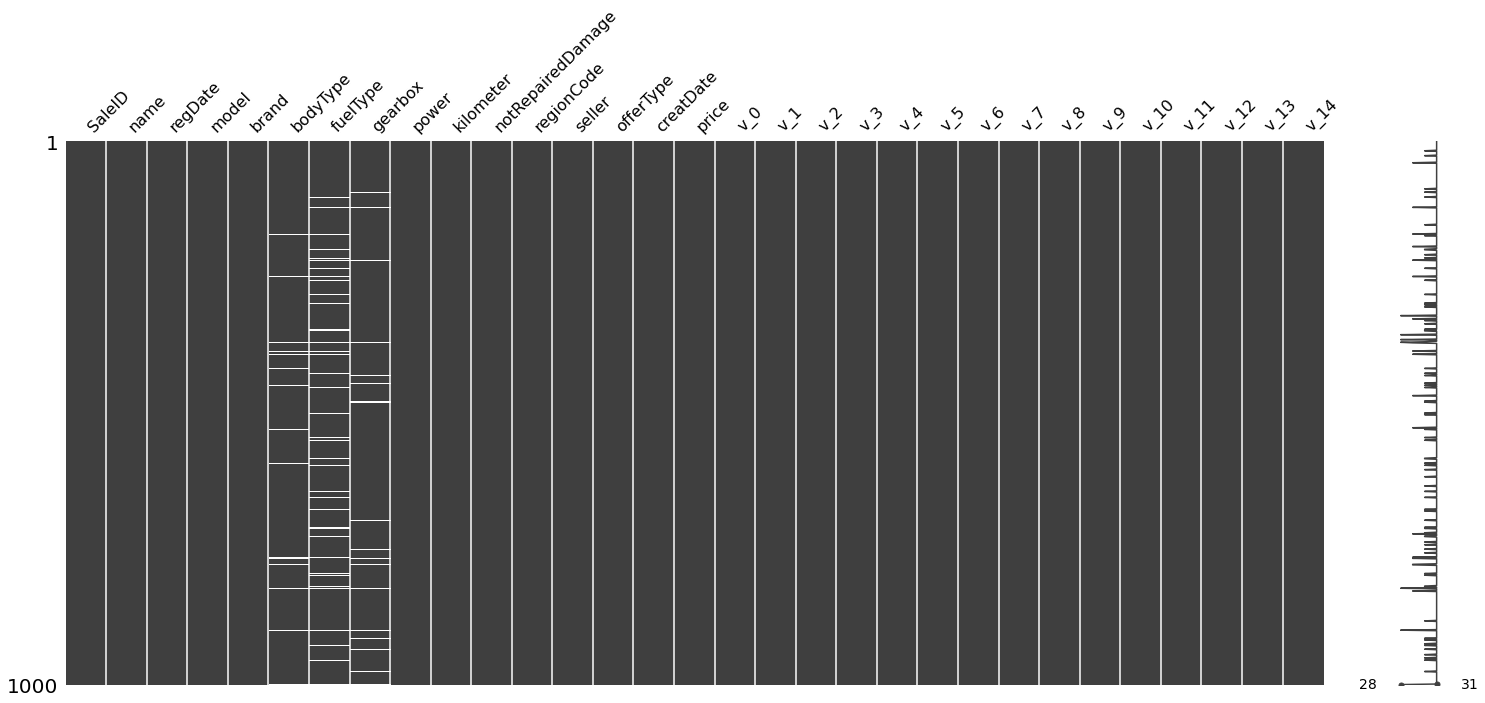

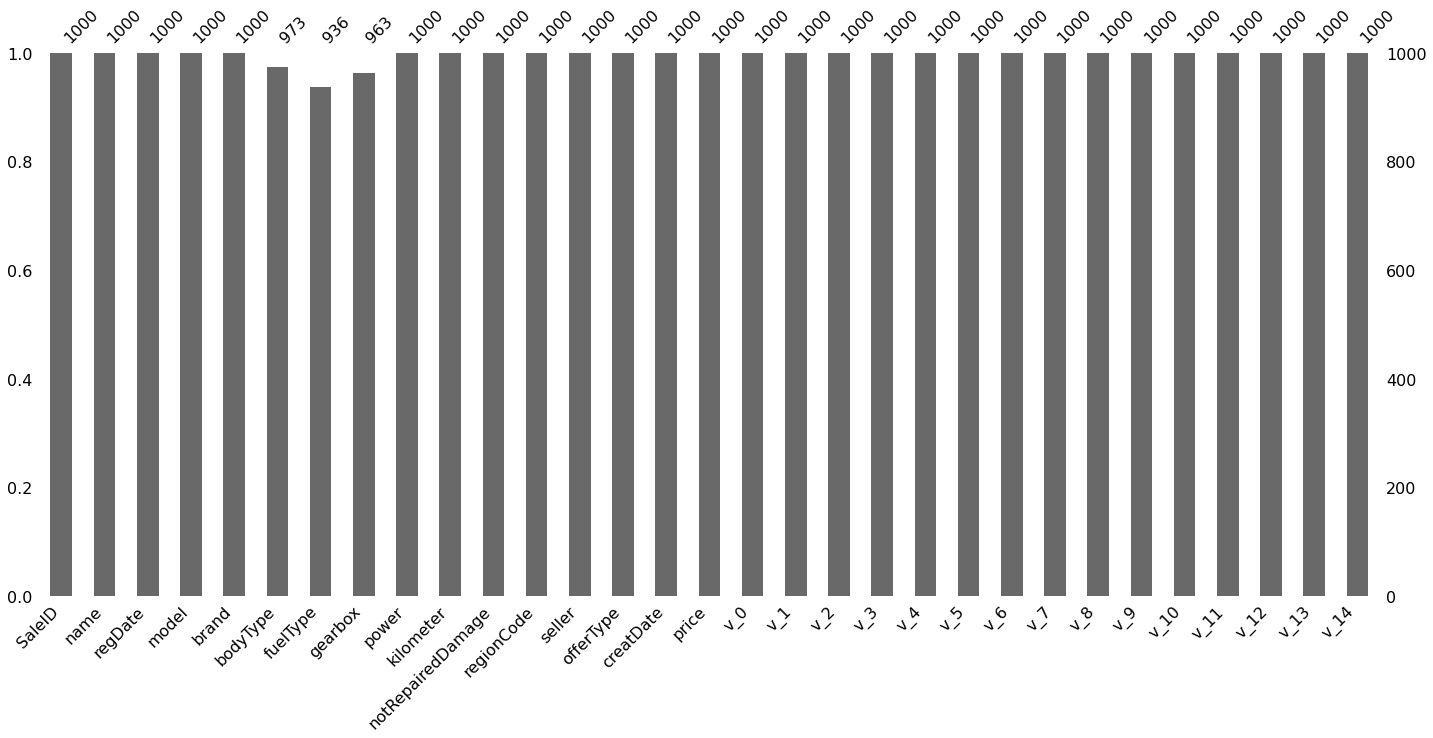

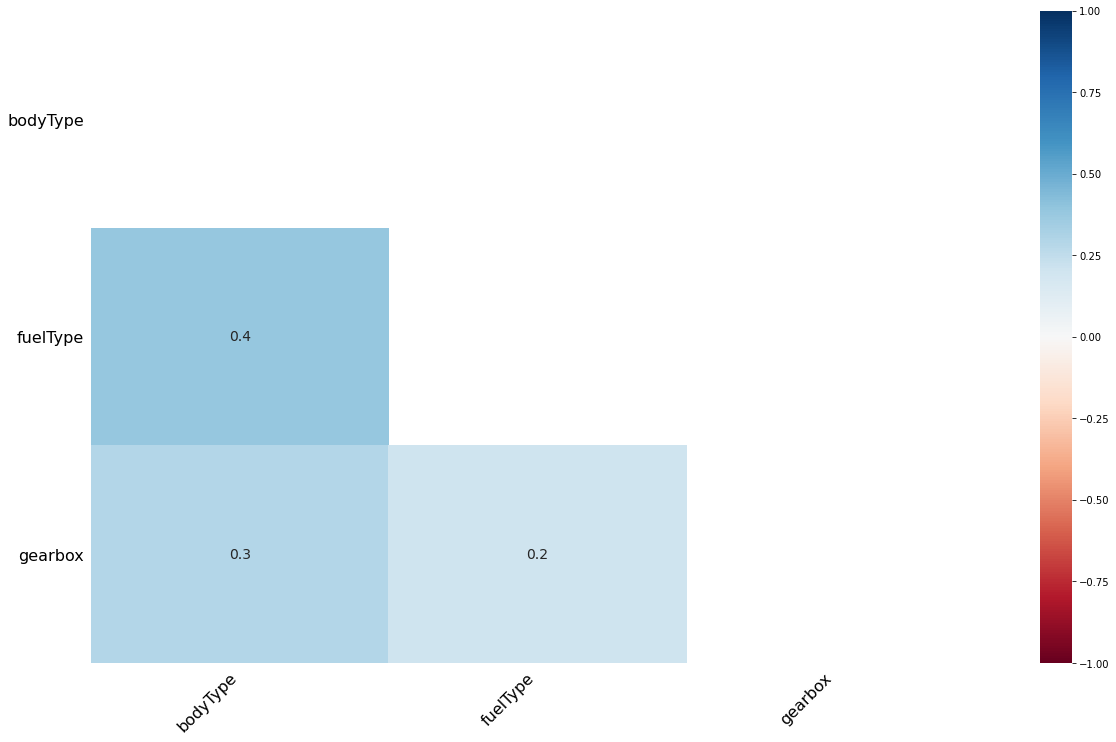

In [7]:
# sample随机抽取
import missingno as msno
sample = train_data.sample(1000)
msno.matrix(sample)
plt.show()
msno.bar(sample)
plt.show()
msno.heatmap(sample)
plt.show()

In [8]:
## 输出数据的大小信息
print('训练集大小:',train_data.shape)
print('测试集大小:',test_data.shape)
# 显示notRepairedDamage的分布情况
print(train_data['notRepairedDamage'].value_counts())

训练集大小: (150000, 31)
测试集大小: (50000, 30)
0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64


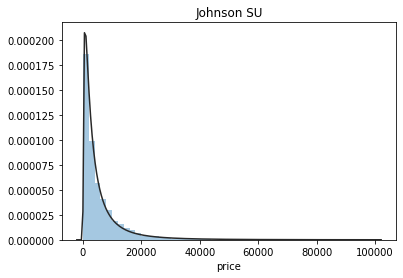

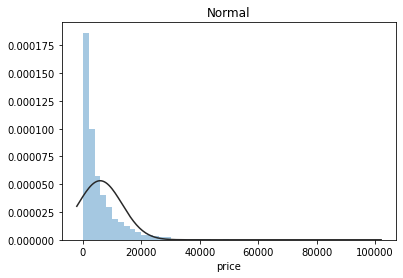

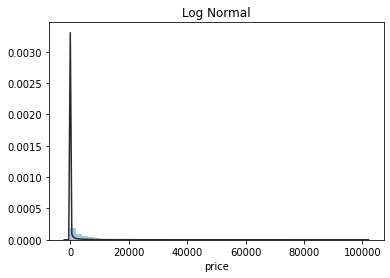

In [9]:
# 研究price的分布
import seaborn as sns
import scipy.stats as st
y = train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

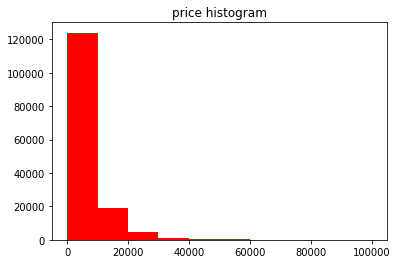

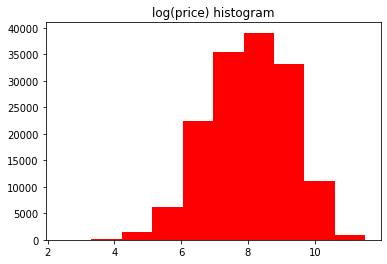

In [10]:
# price 直方图
plt.figure(1); plt.title('price histogram')
plt.hist(train_data['price'], color ='red')
plt.figure(2); plt.title('log(price) histogram')
plt.hist(np.log(train_data['price']), color ='red')
plt.show()

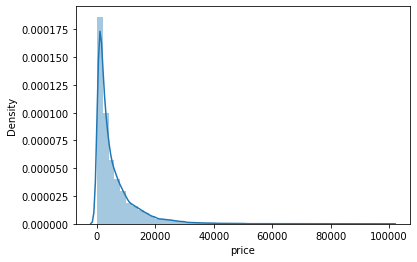

Skewness: 3.346487
Kurtosis: 18.995183


In [11]:
# 计算偏度和峰度（与正态分布进行比较）
sns.distplot(train_data['price'])
plt.show()
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

In [14]:
pip install --upgrade pandas

     |████████████████████████████████| 9.5MB 2.6MB/s 
  Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


In [15]:
pip install --upgrade pandas_Profiling

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 604kB 8.7MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 3.1MB 12.9MB/s 
     |████████████████████████████████| 296kB 28.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=479bd053694c6b73ca99ea220d1f8c861f71be0544acbbb34269e843d592cbbc
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=bd05464c28551f6c720f7d72bf1395ee061bd3e6c115f92d83643421f52dd056
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [13]:
# 一行代码生成报告 需要注意pandas 和 pandas_profiling版本问题 如果过低会报错 用 pip install --upgrade pandas pip install --upgrade pandas_Profiling 更新一下即可
import pandas_profiling as pp
report = pp.ProfileReport(train_data)
# 导出为html
report.to_file('used_car_DEA_report.html')

In [14]:
# notRepairedDamage 缺失值填充
train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
test_data['notRepairedDamage'].replace('-', '0.0', inplace=True)

In [15]:
# 最小时间 1991-00-01，最大时间2015-12-12
print(np.min(train_data['regDate']))
print(np.max(train_data['regDate']))
print(np.min(test_data['regDate']))
print(np.max(test_data['regDate']))

19910001
20151212
19910001
20151211


In [16]:
# 发现很多regDate是1991001,19910002，需要替换为 199101
train_data['regDate'] = train_data['regDate'].astype('str')
train_data['regDate'] = train_data['regDate'].str.replace('199100', '199101')
test_data['regDate'] = test_data['regDate'].astype('str')
test_data['regDate'] = test_data['regDate'].str.replace('199100', '199101')

In [17]:
# 统计使用天数
min_date = pd.to_datetime('19910101', format='%Y%m%d')
print(min_date)
train_data['regTime'] = (pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
train_data['createTime'] = (pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
train_data['usedTime'] = train_data['createTime'] - train_data['regTime']
print(train_data[['regDate', 'creatDate', 'usedTime', 'regTime', 'createTime']])
print(train_data['regDate'])

1991-01-01 00:00:00
         regDate  creatDate  usedTime  regTime  createTime
0       20040402   20160404    4385.0   4840.0        9225
1       20030301   20160309    4757.0   4442.0        9199
2       20040403   20160402    4382.0   4841.0        9223
3       19960908   20160312    7125.0   2077.0        9202
4       20120103   20160313    1531.0   7672.0        9203
...          ...        ...       ...      ...         ...
149995  20000607   20160327    5772.0   3445.0        9217
149996  20091102   20160312    2322.0   6880.0        9202
149997  20101003   20160328    2003.0   7215.0        9218
149998  20060312   20160401    3673.0   5549.0        9222
149999  19990204   20160305    6239.0   2956.0        9195

[150000 rows x 5 columns]
0         20040402
1         20030301
2         20040403
3         19960908
4         20120103
            ...   
149995    20000607
149996    20091102
149997    20101003
149998    20060312
149999    19990204
Name: regDate, Length: 150000, dtype

In [18]:
test_data['regTime'] = (pd.to_datetime(test_data['regDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
test_data['createTime'] = (pd.to_datetime(test_data['creatDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
test_data['usedTime'] = test_data['createTime'] - test_data['regTime']

In [19]:
## 计算某品牌的销售统计
# 这里要以 train 的数据计算统计量
brand_data = train_data.groupby('brand')
all_info={}
for brand_index, brand_temp in brand_data:
    info={}
    brand_temp = brand_temp[brand_temp['price']>0]
    info['brand_amount']=len(brand_temp)
    info['brand_price_max']=brand_temp.price.max()
    info['brand_price_min']=brand_temp.price.min()
    info['brand_price_median']=brand_temp.price.median()
    info['brand_price_sum']=brand_temp.price.sum()
    info['brand_price_std']=brand_temp.price.std()
    info['brand_price_mean']=brand_temp.price.mean()
    all_info[brand_index] =info

brand_stats = pd.DataFrame(all_info).T.reset_index().rename(columns={'index': 'brand'})
print(brand_stats)
train_data = train_data.merge(brand_stats, how = 'left', on='brand')
test_data = test_data.merge(brand_stats, how = 'left', on='brand')
print(train_data.head())

    brand  brand_amount  ...  brand_price_std  brand_price_mean
0       0       31480.0  ...      6272.522119       5535.364994
1       1       13794.0  ...      9369.631497       9273.311947
2       2         321.0  ...     10875.892891      12037.822430
3       3        2461.0  ...      5396.327503       6482.822430
4       4       16737.0  ...      8472.393191       8538.788074
5       5        4665.0  ...      3343.624586       3306.349411
6       6       10217.0  ...      4681.293524       3611.840266
7       7        2361.0  ...      4752.032776       4196.064803
8       8        2077.0  ...      6227.035419       4900.515166
9       9        7306.0  ...      2974.272776       2438.274843
10     10       14249.0  ...      8988.307535       8470.804197
11     11        2945.0  ...      4721.824690       4549.730390
12     12        1109.0  ...      4065.936442       4053.789901
13     13        3817.0  ...      3073.303355       2799.957820
14     14       16089.0  ...      3605.2

In [20]:
train_data.drop(['creatDate', 'regDate'], axis=1, inplace=True)
test_data.drop(['creatDate', 'regDate'], axis=1, inplace=True)

In [21]:
# 提取数值类型特征列名
numerical_cols = train_data.select_dtypes(exclude = 'object').columns
print('numerical_cols=', numerical_cols)

categorical_cols = train_data.select_dtypes(include = 'object').columns
print('categorical_cols=', categorical_cols)

numerical_cols= Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'regionCode', 'seller', 'offerType', 'price',
       'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9',
       'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'regTime', 'createTime',
       'usedTime', 'brand_amount', 'brand_price_max', 'brand_price_min',
       'brand_price_median', 'brand_price_sum', 'brand_price_std',
       'brand_price_mean'],
      dtype='object')
categorical_cols= Index(['notRepairedDamage'], dtype='object')


In [22]:
## 选择特征列
feature_cols = [col for col in numerical_cols if col not in ['SaleID','price']]
print(feature_cols)

['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'regTime', 'createTime', 'usedTime', 'brand_amount', 'brand_price_max', 'brand_price_min', 'brand_price_median', 'brand_price_sum', 'brand_price_std', 'brand_price_mean']


In [23]:
# 提取特征列，标签列构造训练样本和测试样本
X_data = train_data[feature_cols]
Y_data = train_data['price']
X_test  = test_data[feature_cols]

In [24]:
## 定义了一个统计函数，方便后续信息统计
def show_stats(data):
    print('min', np.min(data))
    print('max:', np.max(data))
    print('ptp', np.ptp(data))
    print('mean', np.mean(data))
    print('std', np.std(data))
    print('var', np.var(data))

# 统计标签的基本分布信息¶
print('Price的统计情况:')
show_stats(Y_data)

Price的统计情况:
min 11
max: 99999
ptp 99988
mean 5923.327333333334
std 7501.973469876438
var 56279605.94272992


In [25]:
# 缺省值用-1填补
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.01, gamma=0, subsample=0.8, colsample_bytree=0.9, max_depth=7) 
model.fit(X_data, Y_data)
predict_y = model.predict(X_test)
print('XGBoost 预测结果统计情况')
show_stats(predict_y)

[09:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 预测结果统计情况
min 165.33778
max: 64142.848
ptp 63977.51
mean 4594.9863
std 5536.378
var 30651480.0


In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error

def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

import lightgbm as lgb
def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 150)
    param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2],}
    model = GridSearchCV(estimator, param_grid)
    model.fit(x_train, y_train)
    return model

In [27]:
# 数据集切分
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)

In [28]:
# XGBoost训练
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('XGBoost Validation MAE:',MAE_xgb)
model_xgb_pre = build_model_xgb(X_data,Y_data)
result_xgb = model_xgb_pre.predict(X_test)
print('XGBoost 预测结果 统计情况:')
show_stats(result_xgb)

[09:28:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Validation MAE: 626.9510057399538
[09:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 预测结果 统计情况:
min -618.08154
max: 90417.625
ptp 91035.7
mean 5907.0024
std 7336.052
var 53817656.0


In [29]:
# LightGBM训练
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('LightGBM Validation MAE:',MAE_lgb)
model_lgb_pre = build_model_lgb(X_data,Y_data)
result_lgb = model_lgb_pre.predict(X_test)
print('LightGBM 预测结果 统计情况:')
show_stats(result_lgb)

LightGBM Validation MAE: 604.0278856691765
LightGBM 预测结果 统计情况:
min -675.9387070052286
max: 91916.80515610502
ptp 92592.74386311026
mean 5905.621978005384
std 7354.885717031175
var 54094343.91058917


In [30]:
val_ensemble = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
val_ensemble[val_ensemble<0]=10 # 由于我们发现预测的最小值有负数，而真实情况下，price为负是不存在的，由此我们进行对应的后修正
print('模型融合后的MAE:',mean_absolute_error(y_val,val_ensemble))
predict_y = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*result_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*result_xgb

模型融合后的MAE: 597.1344207868422


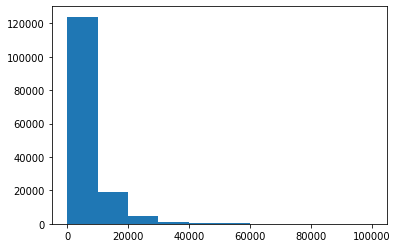

In [31]:
# 查看预测结果的直方图
plt.hist(Y_data)
plt.show()

In [32]:
# 输出结果
sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = predict_y
sub.to_csv('./used_car_xgb_lgb.csv',index=False)
